In [1]:
import tensorflow 

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
df=pd.read_csv("E:/Datasets_for_ML/diabetes.csv")

In [28]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
X=df.drop(['Outcome'],axis=1)

In [30]:
Y=df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [34]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:

hist=model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/30
20/20 [==============================] - 1s 7ms/step - loss: 1.4459 - accuracy: 0.5489 - val_loss: 0.9833 - val_accuracy: 0.4805
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8755 - accuracy: 0.5847 - val_loss: 0.7797 - val_accuracy: 0.5714
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.5912 - val_loss: 0.6608 - val_accuracy: 0.6623
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6059 - val_loss: 0.6651 - val_accuracy: 0.6753
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6564 - val_loss: 0.6487 - val_accuracy: 0.6883
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6645 - val_loss: 0.6474 - val_accuracy: 0.6883
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6531 - val_loss: 0.6351 - val_accuracy: 0.6494
Epoch 8/30
20/20 [==

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.7143
Accuracy: 0.7142857313156128


In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

5/5 [==============================] - 0s 940us/step


<AxesSubplot:>

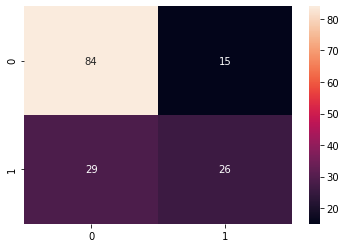

In [38]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, np.round(y_pred))

sns.heatmap(cm, annot=True)

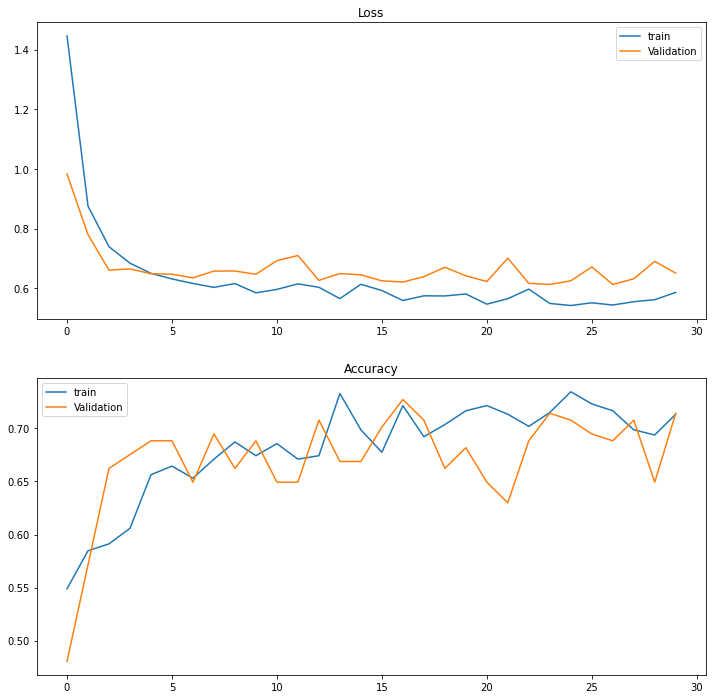

In [39]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras import regularizers


In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
#earlystopping

model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

'''
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2)) 

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2)) 

model.add(Dense(1, activation='sigmoid'))
'''

"\nmodel = Sequential()\nmodel.add(Dense(32, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))\nmodel.add(Dropout(0.2)) \n\nmodel.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))\nmodel.add(Dropout(0.2)) \n\nmodel.add(Dense(1, activation='sigmoid'))\n"

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

hist=model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/30
20/20 [==============================] - 1s 7ms/step - loss: 0.6712 - accuracy: 0.6042 - val_loss: 0.6326 - val_accuracy: 0.7532
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7264 - val_loss: 0.5855 - val_accuracy: 0.7532
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7459 - val_loss: 0.5413 - val_accuracy: 0.7792
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7524 - val_loss: 0.5152 - val_accuracy: 0.7597
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7590 - val_loss: 0.5124 - val_accuracy: 0.7532
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7573 - val_loss: 0.5148 - val_accuracy: 0.7468
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7736 - val_loss: 0.5131 - val_accuracy: 0.7727
Epoch 8/30
20/20 [==

In [46]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7468
Accuracy: 0.7467532753944397


5/5 [==============================] - 0s 1ms/step


<AxesSubplot:>

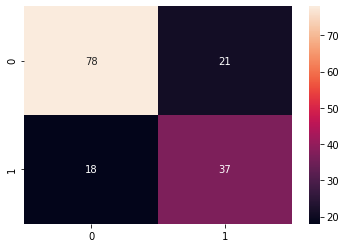

In [47]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, np.round(y_pred))

sns.heatmap(cm, annot=True)



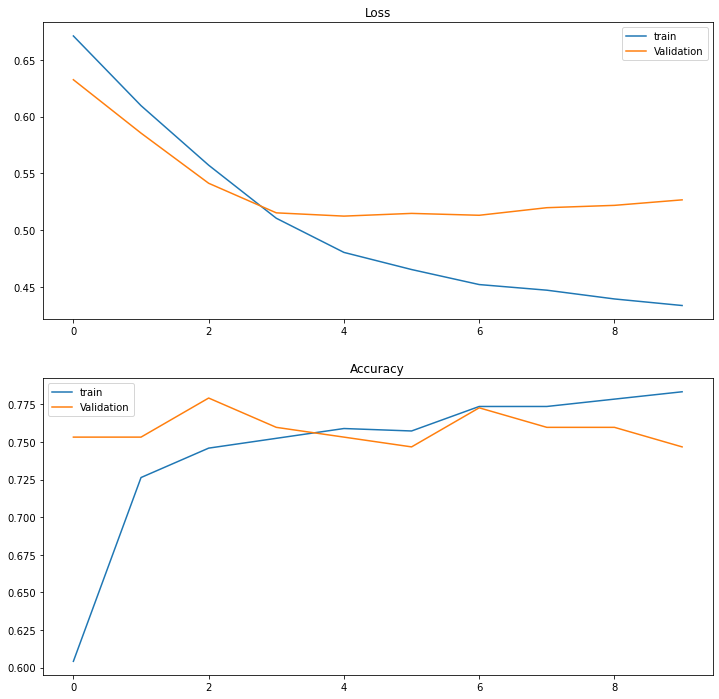

In [48]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [49]:
#droput
model1 = Sequential()
model1.add(Dense(32, input_dim=8, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2)) 

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2)) 

model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [50]:

hist=model1.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/30
20/20 [==============================] - 1s 8ms/step - loss: 0.7465 - accuracy: 0.4528 - val_loss: 0.7011 - val_accuracy: 0.5260
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6075 - val_loss: 0.6462 - val_accuracy: 0.6558
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6743 - val_loss: 0.5993 - val_accuracy: 0.6623
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6759 - val_loss: 0.5537 - val_accuracy: 0.7338
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7052 - val_loss: 0.5187 - val_accuracy: 0.7403
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7362 - val_loss: 0.4959 - val_accuracy: 0.7792
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7296 - val_loss: 0.4931 - val_accuracy: 0.7597
Epoch 8/30
20/20 [==

In [51]:
loss, accuracy = model1.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 998us/step - loss: 0.5348 - accuracy: 0.7338
Accuracy: 0.7337662577629089


5/5 [==============================] - 0s 756us/step


<AxesSubplot:>

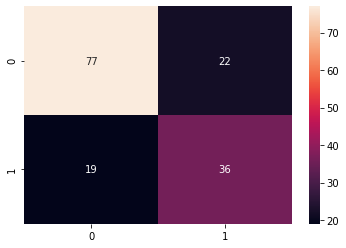

In [52]:
y_pred = model1.predict(X_test)

cm = confusion_matrix(y_test, np.round(y_pred))

sns.heatmap(cm, annot=True)



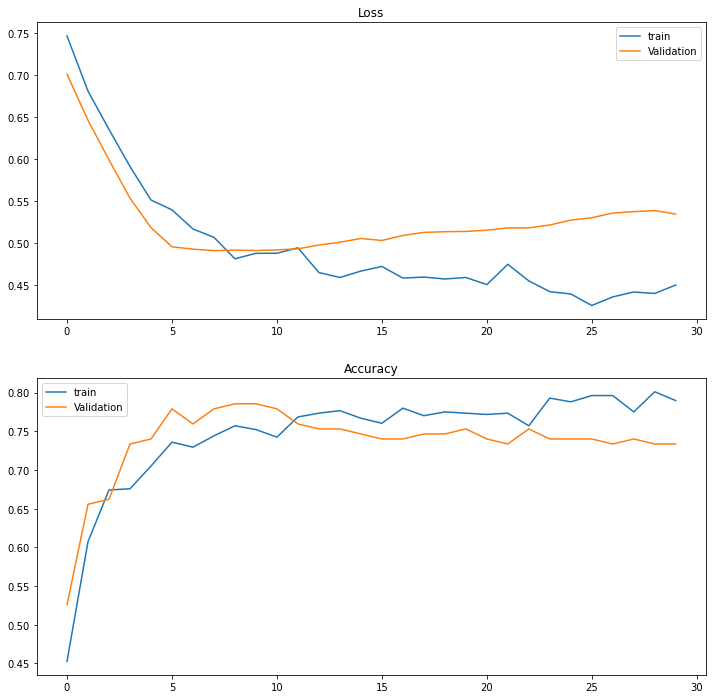

In [53]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [54]:
#l1 regularisation
model2 = Sequential()
model2.add(Dense(32, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1(0.01)))

model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)))

model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [56]:

hist=model2.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/30
20/20 [==============================] - 1s 16ms/step - loss: 4.1615 - accuracy: 0.6547 - val_loss: 3.9567 - val_accuracy: 0.6494
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 3.7498 - accuracy: 0.6612 - val_loss: 3.5669 - val_accuracy: 0.6558
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 3.3715 - accuracy: 0.6678 - val_loss: 3.2027 - val_accuracy: 0.6753
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 3.0205 - accuracy: 0.6873 - val_loss: 2.8646 - val_accuracy: 0.6883
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 2.6955 - accuracy: 0.7085 - val_loss: 2.5539 - val_accuracy: 0.7208
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 2.3942 - accuracy: 0.7427 - val_loss: 2.2640 - val_accuracy: 0.7338
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 2.1160 - accuracy: 0.7524 - val_loss: 1.9989 - val_accuracy: 0.7532
Epoch 8/30
20/20 [=

In [57]:
loss, accuracy = model2.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.7403
Accuracy: 0.7402597665786743


5/5 [==============================] - 0s 749us/step


<AxesSubplot:>

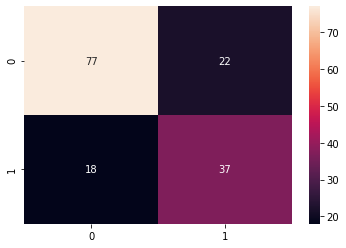

In [58]:
y_pred = model2.predict(X_test)

cm = confusion_matrix(y_test, np.round(y_pred))

sns.heatmap(cm, annot=True)



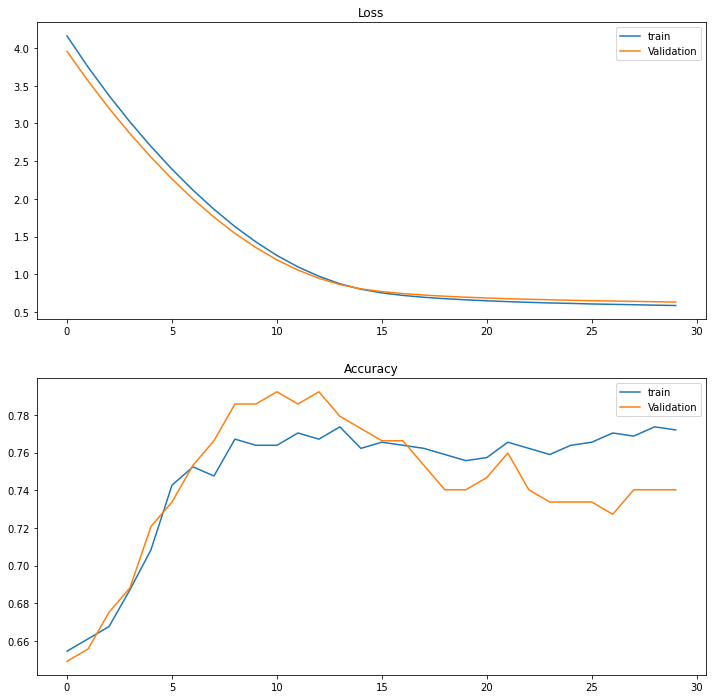

In [59]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [60]:
#l2

model3 = Sequential()
model3.add(Dense(32, input_dim=8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model3.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model3.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [61]:

hist=model3.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/30
20/20 [==============================] - 1s 8ms/step - loss: 1.3614 - accuracy: 0.7020 - val_loss: 1.2841 - val_accuracy: 0.7208
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 1.2030 - accuracy: 0.7394 - val_loss: 1.1679 - val_accuracy: 0.7597
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 1.0890 - accuracy: 0.7557 - val_loss: 1.0721 - val_accuracy: 0.7532
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.7655 - val_loss: 1.0000 - val_accuracy: 0.7662
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.9325 - accuracy: 0.7720 - val_loss: 0.9390 - val_accuracy: 0.7597
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.7866 - val_loss: 0.8942 - val_accuracy: 0.7662
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.7850 - val_loss: 0.8525 - val_accuracy: 0.7727
Epoch 8/30
20/20 [==

In [68]:
loss, accuracy = model3.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7662
Accuracy: 0.7662337422370911


5/5 [==============================] - 0s 1ms/step


<AxesSubplot:>

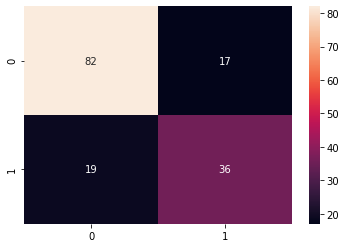

In [69]:
y_pred = model3.predict(X_test)

cm = confusion_matrix(y_test, np.round(y_pred))

sns.heatmap(cm, annot=True)



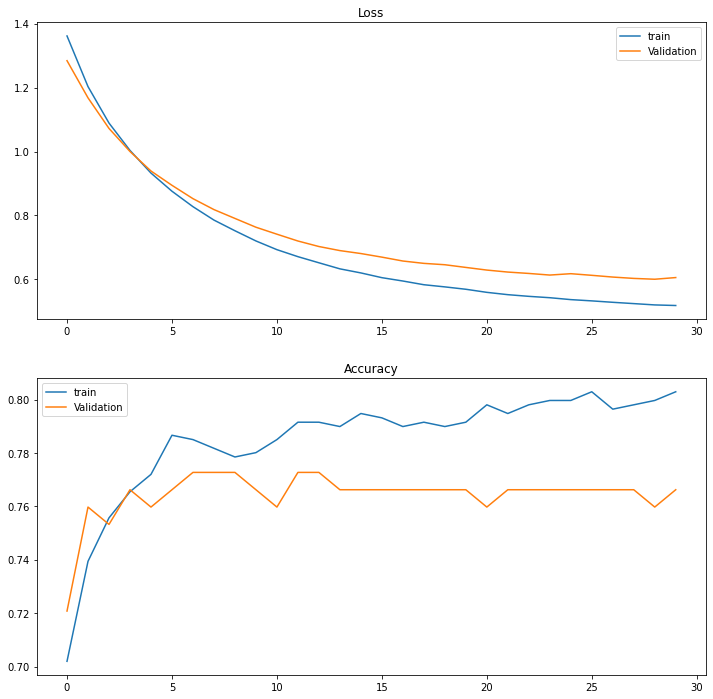

In [70]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [66]:
from keras.layers import BatchNormalization


In [67]:
#batchnormalization

model4 = Sequential()
model4.add(Dense(32, input_dim=8, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:

hist=model4.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/30
20/20 [==============================] - 1s 9ms/step - loss: 0.8265 - accuracy: 0.4870 - val_loss: 0.6660 - val_accuracy: 0.6688
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6743 - val_loss: 0.6302 - val_accuracy: 0.7208
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7296 - val_loss: 0.6011 - val_accuracy: 0.7208
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7410 - val_loss: 0.5765 - val_accuracy: 0.7338
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7687 - val_loss: 0.5615 - val_accuracy: 0.7338
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7785 - val_loss: 0.5482 - val_accuracy: 0.7338
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7736 - val_loss: 0.5395 - val_accuracy: 0.7468
Epoch 8/30
20/20 [==

In [72]:
loss, accuracy = model4.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.7208
Accuracy: 0.7207792401313782


5/5 [==============================] - 0s 1ms/step


<AxesSubplot:>

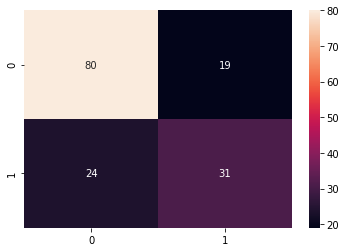

In [73]:
y_pred = model4.predict(X_test)

cm = confusion_matrix(y_test, np.round(y_pred))

sns.heatmap(cm, annot=True)

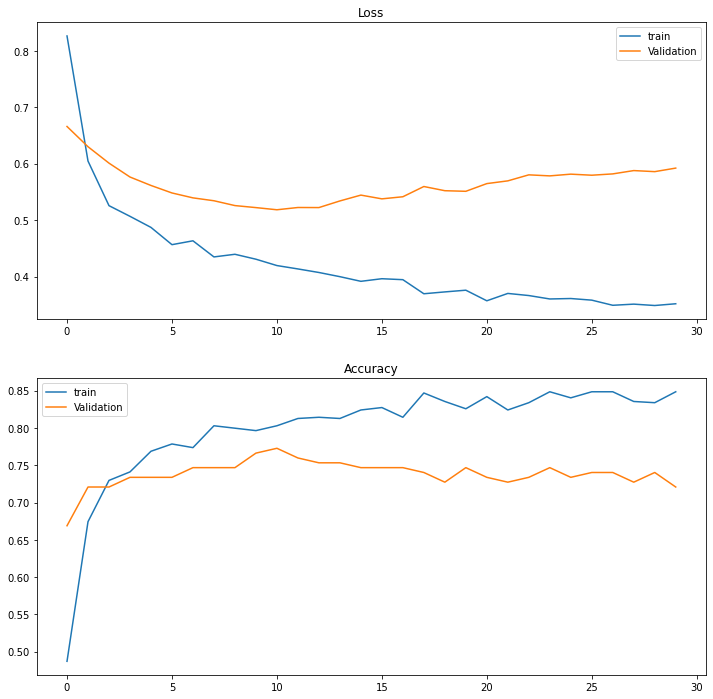

In [74]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()